<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/cifar10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/keras_functional.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [ ]:
# Last amended: 5th Feb, 2021
# Myfolder: C:\Users\ashokharnal\OneDrive\Documents\deep_learning\cifar10 image classification
#           lubuntu_deeplearning-I
#	Objective:
#		 CIFAR10 image classification with deep-learning CNN


In [2]:
# 1.1 Import array-manipulation library
import numpy as np

# 1.2 Import tensorflow
import tensorflow as tf
from tensorflow import keras

In [3]:

# 1.3 Import keras subroutines for fetching the CIFAR-10 dataset
#     The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes,
#      with 6000 images per class. There are 50000 training images and 10000
#       test images.  They were collected by Alex Krizhevsky, Vinod Nair, and
#         Geoffrey Hinton. Classes are: airplane, automobile, bird, cat, deer,
#          dog, frog, horse, ship, truck
#            (CIFAR: Canadian Institute For Advanced Research) 

from keras.datasets import cifar10


In [115]:
# 1.4 Basic classes for specifying and training a neural network
#     Keras has two types of models Sequential and Model Class for complex models
#     Sequential models are essentially layer-by-layer. Model Class models may
#     also have branching.

from keras.models import Sequential
from keras.utils import plot_model

In [55]:
# 1.5 Import layers that will be used in modeling
from keras.layers import Input,Convolution2D, MaxPooling2D, Dropout, Flatten, Dense


In [6]:
# 1.6 Keras utilities for one-hot encoding of ground truth values
from keras.utils import np_utils

In [7]:
# 1.7 Import keras optimizers unless you want default parameters
# from keras.optimizers import Adam

# 1.8
import os, time
import matplotlib.pyplot as plt
# %matplotlib inline


In [8]:
# 1.9 Display outputs from multiple commands in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:

#%%                                 B. Define needed constants

# 2.0 Set some hyperparameters

# 2.1
batch_size = 16   # A batch of 'batch_size' training examples is fed before 
                  #  every error correction  
# 2.2
num_epochs = 5    # Over the entire training set, we iterate 5 times 
                  # Thus per epoch, there will be (X_train.shape[0]/batch_size) batches
# 2.3
kernel_size = 3   # we will use 3x3 kernels throughout
# 2.4
pool_size = 2     # we will use 2x2 pooling throughout
# 2.5
conv_depth_1 = 32 # we will initially have 32 filters per conv. layer...
                  # Remember each filter extracts some structure from image data
# 2.6
conv_depth_2 = 64 # ...switching to 64 filters  the first pooling layer
# 2.7
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
# 2.8
drop_prob_2 = 0.5  # dropout in the FC layer with probability 0.5
# 2.9
hidden_size = 512  # the FC layer will have 512 neurons


In [10]:
#%%                     C. Fetch cifar10 images & transform
"""
About CIFAR-10 images
Ref: https://en.wikipedia.org/wiki/CIFAR-10
The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a
collection of images that are commonly used to train machine learning
and computer vision algorithms. It is one of the most widely used datasets
for machine learning research. The CIFAR-10 dataset contains 60,000 32x32
color images in 10 different classes. The 10 different classes represent
airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.
There are 6,000 images of each class. (Alex Krizhevsky)
"""


'\nAbout CIFAR-10 images\nRef: https://en.wikipedia.org/wiki/CIFAR-10\nThe CIFAR-10 dataset (Canadian Institute For Advanced Research) is a\ncollection of images that are commonly used to train machine learning\nand computer vision algorithms. It is one of the most widely used datasets\nfor machine learning research. The CIFAR-10 dataset contains 60,000 32x32\ncolor images in 10 different classes. The 10 different classes represent\nairplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.\nThere are 6,000 images of each class. (Alex Krizhevsky)\n'

In [11]:
#  3. Download, unzip and divide into training/test data cifar10 images
#      By default download occurs at C:\Users\ashokharnal\.keras\datasets\
#      Or at /home/ashok/.keras/datasets ;  Downloaded file: cifar-10-batches-py.tar.gz.
#       Expanded in folder: cifar-10-batches-py
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape              # (50000, 32, 32, 3):50000 images, 32 X 32 pixels, 3-channels
y_train.shape              # (50000, 1)

170500096/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

(50000, 1)

In [12]:
# 3.1 Have a look at the data
X_train[0,:3, :3,0]  # Pixel intensity values in the  
                     #  slice of 3X3 from Ist image
                     #   and Ist channel         
y_train[:10,:]


array([[59, 43, 50],
       [16,  0, 18],
       [25, 16, 49]], dtype=uint8)

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [16]:
# 3.2 Let us check min and max values
#     of pixel intensities
print(X_train.min())      # 0
print(X_train.max())      # 255

0
255


In [17]:
# 4. There are 50000 training examples in CIFAR-10
num_train, height, width, depth = X_train.shape

In [25]:
# 4.1 There are 10000 test examples in CIFAR-10
num_test = X_test.shape
print(num_test)

(10000, 32, 32, 3)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [29]:
# 4.2.1 Class names are in alphabetical sequence

class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [31]:

# 4.2.2 There are 10 image classes
num_classes = np.unique(y_train).shape[0]
num_classes
class_names = ["airplane","automobile","bird",
               "cat","deer","dog","frog","horse",
               "ship","truck"]



10

In [38]:
# 5. See one image
i = 1
im1 = X_train[i]    # Get the ith image array

# 5.1 To which class does it belong
y_train[i]
k = class_names[y_train[i][0]]           # Get 0th element of y_train[1]
print(k)

array([9], dtype=uint8)

truck


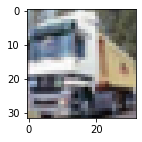

In [39]:
# 5.2 Plot the image
fig = plt.figure(figsize=(4,2))
plt.imshow(im1)                         # imshow() is a matplotlib method
plt.show()


In [40]:
# 5.3 Change array types and normalise
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= np.max(X_train)              # Normalise data to [0, 1] range
X_test /= np.max(X_test)                # It is a global rather than column-wise (axis =0)
                                        # normalization


In [42]:
# 5.4 This is columnwise normalization
a = np.array([[2,3,4], [50,100,200]])
a = a/np.max(a, axis = 0)
a

array([[0.04, 0.03, 0.02],
       [1.  , 1.  , 1.  ]])

In [49]:
# 6. One-hot encode the labels
#     Using tf.keras.utils.to_categorical()

a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
print(a)
print(type(a))

# 6.1 Convert a to a constant tensor
a = tf.constant(a, shape=[4, 4])
print(a)
a[0,0]
# a[0,0] = 2   # Error

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
<class 'numpy.ndarray'>
tf.Tensor(
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]], shape=(4, 4), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [50]:
# 6.2 Create another constant
b = tf.constant([.9, .04, .03, .03,
                 .3, .45, .15, .13,
                 .04, .01, .94, .05,
                 .12, .21, .5, .17],
                shape=[4, 4])
# 6.3 Measure extent of categorical_crossentropy loss
loss = tf.keras.backend.categorical_crossentropy(a, b)
print(loss)                # It is a tensor
print(np.around(loss, 5))

tf.Tensor([0.10536048 0.8280665  0.10109606 1.7719568 ], shape=(4,), dtype=float32)
[0.10536 0.82807 0.1011  1.77196]


In [53]:
# 6.4
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_train[2:5, :]
y_train[2:5]
Y_test = np_utils.to_categorical(y_test, num_classes)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

array([[9],
       [4],
       [1]], dtype=uint8)

In [56]:
#%%                               D. Model building

# 7. Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
#    Same padding means the size of output feature-maps are the same as
#    the input feature-maps (under the assumption of stride=1)
#    padding= "SAME" tries to pad evenly left and right, but if the amount
#    of columns to be added is odd, it will add the extra column to the right
# 7.1
# See keras layers: https://keras.io/layers/about-keras-layers/
model = Sequential()
model.add(Input(shape = (height,width,depth)))
model.add(
          Convolution2D(conv_depth_2,                            # 32 filters
                        kernel_size,               # 3 X 3
                        padding='same',                           # Do zero padding
                        activation='relu'
                       )
           )


In [57]:
#7.1.1
model.add(Convolution2D(conv_depth_1,
                       (kernel_size, kernel_size),
                        padding='valid',
                        activation='relu')
                        )


In [58]:
# 7.1.2
model.add(MaxPooling2D(
	                   pool_size=(pool_size, pool_size))         # 2 X 2
                      )


In [59]:
# 7.1.3
# https://keras.io/layers/core/#dropout
model.add(Dropout(
	                 drop_prob_1                                    # 0.25
	               )
          )

In [60]:
# 7.2 Now flatten to 1D, apply FC -> ReLU (with dropout) -> softmax
#     Fully connected layer
#    https://keras.io/layers/core/#flatten
model.add(Flatten())


In [39]:
# 7.2.1 Output of this dense layer: Ist hidden layer
#       https://keras.io/layers/core/#dense
"""
Dense implements the operation:
   output = activation(dot(input, kernel) + bias)
   where activation is the element-wise activation function
   passed as the activation argument, kernel is a weights matrix
   created by the layer, and bias is a bias vector created by the
   layer (only applicable if use_bias is True).
   Size of output has to be specified
"""


'\nDense implements the operation:\n   output = activation(dot(input, kernel) + bias)\n   where activation is the element-wise activation function\n   passed as the activation argument, kernel is a weights matrix\n   created by the layer, and bias is a bias vector created by the\n   layer (only applicable if use_bias is True).\n   Size of output has to be specified\n'

In [61]:
# 7.2.2
model.add(Dense(hidden_size, activation='relu'))   # output size = hidden_size

model.add(
           Dropout
	             (
	             drop_prob_2                                      # 0.5
	             )
	       )


In [41]:
# 7.2.3 Final output layer; softmax
#       About softmax: https://en.wikipedia.org/wiki/Softmax_function
#       exp(xi)/Sigma(exp(xk))
"""
Softmax
    If we take an input of [1, 2, 3, 4, 1, 2, 3], the softmax of that
    is [0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]. The output
    has most of its weight where the '4' was in the original input.
    This is what the function is normally used for: to highlight the
    largest values and suppress values which are significantly below
    the maximum value.
    See calculations at the end of his code.
"""


"\nSoftmax\n    If we take an input of [1, 2, 3, 4, 1, 2, 3], the softmax of that\n    is [0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]. The output\n    has most of its weight where the '4' was in the original input.\n    This is what the function is normally used for: to highlight the\n    largest values and suppress values which are significantly below\n    the maximum value.\n    See calculations at the end of his code.\n"

In [62]:
# 7.2.4
model.add(
             Dense(num_classes,activation='softmax')
         )


In [63]:
# 7.3 Compile model and add necesary parameters
#     Cross entropy: http://203.122.28.230/moodle/mod/url/view.php?id=1409
#
model.compile(
              loss='categorical_crossentropy',            # using the cross-entropy loss function
              optimizer='adam',                           # using the Adam optimiser
                                                          # Ref: https://keras.io/optimizers/
                                                          # keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
              metrics=['accuracy'])                       # reporting the accuracy


In [64]:

#%%                              E. Model training and evaluation
# 8. ...holding out 10% of the data for validation. 26 minutes
#       To save time consider just 20000 samples for training
#       10% of these, ie 2000 are for validation

# 8.1
X_train.shape
Y_train.shape


(50000, 32, 32, 3)

(50000, 10)

In [65]:
# 8.2  Takes 20 minutes
#      Specify fit/train hyperparameters
# Validation_split: Fraction of the training data to be used
#                   as validation data. The model will set apart
#                   this fraction of the training data, will not
#                   train on it, and will evaluate the loss and
#                   any model metrics on this data at the end of 
#                   each epoch.

start = time.time()
history = model.fit(X_train[:25000],       # Train model using limited training data
                    Y_train[:25000],
                    batch_size=batch_size, # Total batches: (25000 - 2500)/16 = 1407
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=0.1   # 2500
                    )
end = time.time()
print ((end - start)/60)


Epoch 1/5
1407/1407 [==============================] - 145s 102ms/step - loss: 1.8054 - accuracy: 0.3382 - val_loss: 1.2531 - val_accuracy: 0.5536
Epoch 2/5
1407/1407 [==============================] - 144s 102ms/step - loss: 1.2930 - accuracy: 0.5411 - val_loss: 1.1246 - val_accuracy: 0.5976
Epoch 3/5
1407/1407 [==============================] - 144s 102ms/step - loss: 1.1118 - accuracy: 0.6081 - val_loss: 1.0625 - val_accuracy: 0.6284
Epoch 4/5
1407/1407 [==============================] - 145s 103ms/step - loss: 0.9642 - accuracy: 0.6567 - val_loss: 1.0678 - val_accuracy: 0.6256
Epoch 5/5
1407/1407 [==============================] - 144s 102ms/step - loss: 0.8418 - accuracy: 0.7018 - val_loss: 0.9797 - val_accuracy: 0.6588
12.047547864913941


In [66]:
# 8.3 Certain parameters are associated
#     with 'history' object
history.epoch
history.params

[0, 1, 2, 3, 4]

{'epochs': 5, 'steps': 1407, 'verbose': 1}

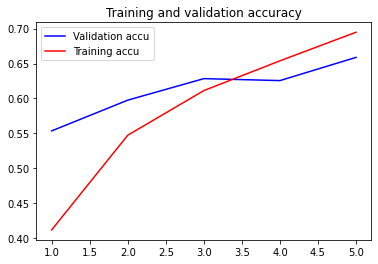

In [121]:

# 8.4 How accuracy changes as epochs increase
#     We will use this function again and again
#     in subsequent examples

def plot_history():
    val_acc = history.history['val_accuracy']
    tr_acc=history.history['accuracy']
    epochs = range(1, len(val_acc) +1)
    plt.plot(epochs,val_acc, 'b', label = "Validation accu")
    plt.plot(epochs, tr_acc, 'r', label = "Training accu")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.show()

plot_history()

In [68]:
""
# 9. Evaluate the trained model on the test set!
#    Returns the loss value & metrics values for
#    the model in test mode.
model.evaluate(X_test, Y_test, verbose=1)      # Accuracy is just 10%


313/313 [==============================] - 12s 38ms/step - loss: 1.0125 - accuracy: 0.6445


[1.0125203132629395, 0.6445000171661377]

In [76]:

# 10.0 Make predictions
#      Generates output predictions for the input samples.
y_pred = model.predict(X_test)
y_pred[0]

(10000, 10)

In [107]:
# 10.1 Prob to integer
ypred = np.argmax(y_pred, axis = 1)
print(ypred)
print("---")
y_test[:4]

[6 8 8 ... 2 4 7]
---


array([[3],
       [8],
       [8],
       [0]], dtype=uint8)

In [104]:
# 10.2 Accuracy
np.sum(ypred == y_test.flatten())/10000

0.6445

In [108]:

# 10.3 How does the model look like?
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3686912   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)              

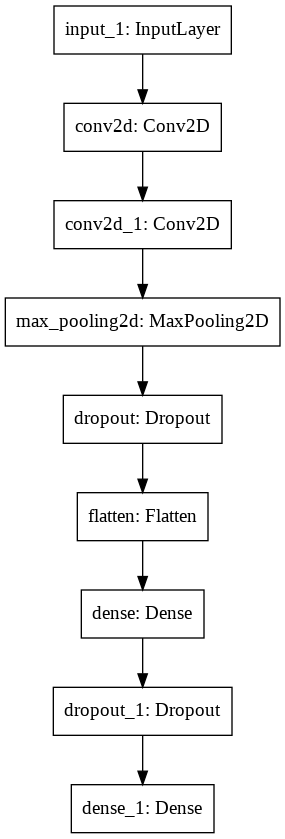

In [116]:
# 10.4 Here is a plot of the model
plot_model(model)

114.98389973429897

[0.023640543021591385,
 0.06426165851049616,
 0.17468129859572226,
 0.4748329997443803,
 0.023640543021591385,
 0.06426165851049616,
 0.17468129859572226]

0.9999999999999999

(array([2., 0., 0., 2., 0., 0., 2., 0., 0., 1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

(array([4., 0., 0., 2., 0., 0., 0., 0., 0., 1.]),
 array([0.02364054, 0.06875979, 0.11387903, 0.15899828, 0.20411753,
        0.24923677, 0.29435602, 0.33947526, 0.38459451, 0.42971375,
        0.474833  ]),
 <a list of 10 Patch objects>)

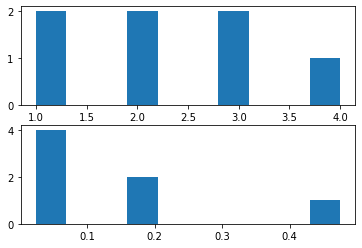

In [114]:
###################### END##
# 11. Softmax calulations
import math
z = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
z_exp = [math.exp(i) for i in z]
sum_z_exp = sum(z_exp)
sum_z_exp
softmax = [i / sum_z_exp for i in z_exp]
softmax
sum(softmax)

# 11.1 Plot histogram
fig,ax = plt.subplots(nrows=2,ncols =1)
ax[0].hist(z)
ax[1].hist(softmax)
plt.show()
############################